# Проект: Принятие решений в бизнесе

**Цель проекта:** Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Часть 1: Приоритизация гипотез**

**Входные данные:**
- Файл `hypothesis.csv`

**Описание файла:**
- *Hypothesis* — краткое описание гипотезы;
- *Reach* — охват пользователей по 10-балльной шкале;
- *Impact* — влияние на пользователей по 10-балльной шкале;
- *Confidence* — уверенность в гипотезе по 10-балльной шкале;
- *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Задачи:**
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2: Анализ A/B-теста**

**Входные данные:**
- Файл `orders.csv`
- Файл `visitors.csv`

**Описание файлов:**

**Файл `orders.csv`:**
- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.

**Файл `visitors.csv`:**
- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

**Задачи:**
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его.

**План работы:**
- Шаг 1. Предобработка данных
- Шаг 2. Приоритизация гипотез
- Шаг 3. Анализ А/В-теста
- Шаг 4. Статистическая значимость

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
import numpy as np 
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import os

In [2]:
pth1 = '/datasets/hypothesis.csv'
pth2 = 'hypothesis.csv'
pth3 = '/datasets/orders.csv'
pth4 = 'orders.csv'
pth5 = '/datasets/visitors.csv'
pth6 = 'visitors.csv'
if os.path.exists(pth1):
    hypothesis  = pd.read_csv(pth1)
    orders = pd.read_csv(pth3)
    visitors = pd.read_csv(pth5)
else:
    hypothesis  = pd.read_csv(pth2)
    orders = pd.read_csv(pth4)
    visitors = pd.read_csv(pth6)

Посмотрим файл `hypothesis` и сделаем предобработку, если нужно.

In [3]:
pd.options.display.max_colwidth = 150

In [4]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
# приводим названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
# считаем дубликаты
hypothesis.duplicated().sum()

0

In [8]:
# считаем пропуски
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Посмотрим файл `orders` и сделаем предобработку.

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
# изменяем тип данных колонки date
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
# считаем дубликаты
orders.duplicated().sum()

0

In [13]:
# считаем пропуски
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Посмотрим файл `visitors` и сделаем предобработку.

In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
# изменяем тип данных колонки date
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [17]:
# считаем дубликаты
visitors.duplicated().sum()

0

In [18]:
# считаем пропуски
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропусков и дубликатов в данных не обнаружено, тип данных изменен на корректный. Данные загружены и готовы к анализу.

## Приоритизация гипотез

**Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [19]:
pd.set_option('display.precision', 2)

In [20]:
hypothesis['ICE'] = (hypothesis['impact'] *  hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False, inplace=True)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


По ICE приоритет у 8, 0 и 7 гипотез.

**Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [21]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] *  hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False, inplace=True)
hypothesis 

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


По RICE приоритет у 7, 2 и 0 гипотез.

**Вывод:** Разница фреймворков ICE и RICE между собой заключается в том, что RICE учитывает кол-во пользователей (охват), которых затронут изменения, а ICE - нет. Видим, что 8-ая гипотеза опустилась. Её охват (reach) равен 1, в то время как  у 7-ой гипотезы он равен 10, поэтому она вырвалась в лидеры.

## Анализ А/В-теста

Предварительно изучим количество заказов и посещений в каждой из групп.

In [22]:
# количество посещений в группе А
visitors.query('group == "A"')['visitors'].sum()

18736

In [23]:
# количество посещений в группе B
visitors.query('group == "B"')['visitors'].sum()

18916

In [24]:
# количество заказов в группе А
orders.query('group == "A"').shape[0]

557

In [25]:
# количество заказов в группе В
orders.query('group == "B"').shape[0]

640

В группе В на 180 посещений больше, чем в группе А.

 Проверим, не попали ли некоторые пользователи в разные группы.

In [26]:
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']

In [27]:
visitors_AB = orders.loc[orders['visitorId'].isin(visitorsA) & orders['visitorId'].isin(visitorsB), 'visitorId'].unique()

In [28]:
visitors_AB.shape[0]

58

In [29]:
(orders.groupby('visitorId')['group'].nunique()>1).count()

1031

Удалим таких пользователей и посмотрим, сколько осталось.

In [30]:
orders = orders.loc[~orders['visitorId'].isin(visitors_AB)]
(orders.groupby('visitorId')['group'].nunique()>1).count()

973

Подготовим таблицу с куммулятивными данными по выручке и посещениям.

In [31]:
register_matplotlib_converters()
dates_groups = orders[['date','group']].drop_duplicates()

In [32]:
dates_groups = orders[['date','group']].drop_duplicates()
orders_aggregated = (dates_groups
                     .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionId':'nunique'}), axis=1) 
                    .sort_values(by=['date','group']))

In [33]:
orders_aggregated.rename(columns={'transactionId':'orders'}, inplace=True)
orders_aggregated.head()

,date,group,revenue,orders
55,2019-08-01,A,142779,23
66,2019-08-01,B,59758,17
175,2019-08-02,A,234381,42
173,2019-08-02,B,221801,40
291,2019-08-03,A,346854,66


In [34]:
visitors_aggregated = (dates_groups
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                    .sort_values(by=['date','group']))
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


**Построим график кумулятивной выручки по группам.**

In [35]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date','group'])
cumulative_data.head()

,date,group,revenue,orders,visitors
0,2019-08-01,A,142779,23,719
1,2019-08-01,B,59758,17,713
2,2019-08-02,A,234381,42,1338
3,2019-08-02,B,221801,40,1294
4,2019-08-03,A,346854,66,1845


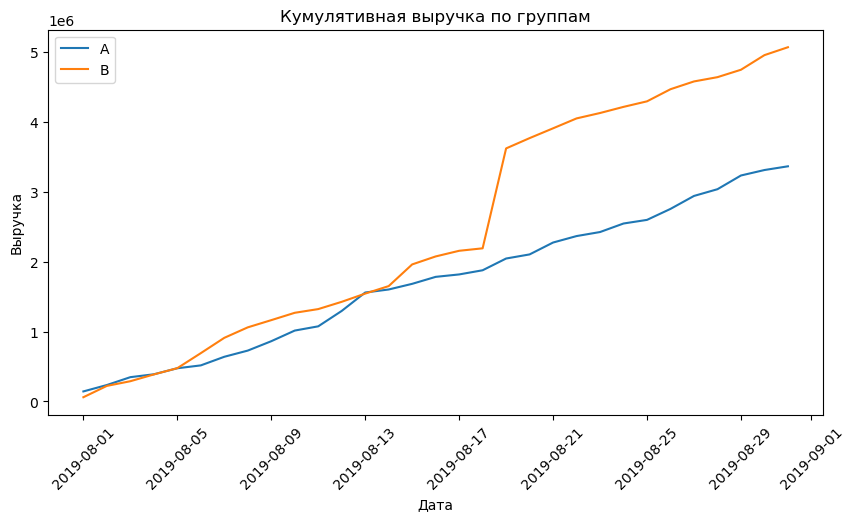

In [36]:
cumulative_a = cumulative_data.loc[cumulative_data['group'] == 'A',['date', 'revenue', 'orders', 'visitors']]
cumulative_b = cumulative_data.loc[cumulative_data['group'] == 'B',['date', 'revenue', 'orders', 'visitors']]

plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по группам')
plt.legend();

Группа А растет постепенно, в то время как в В есть резкий рост после 17.08. Это может быть большим заказом.

**Построим график кумулятивного среднего чека по группам.**

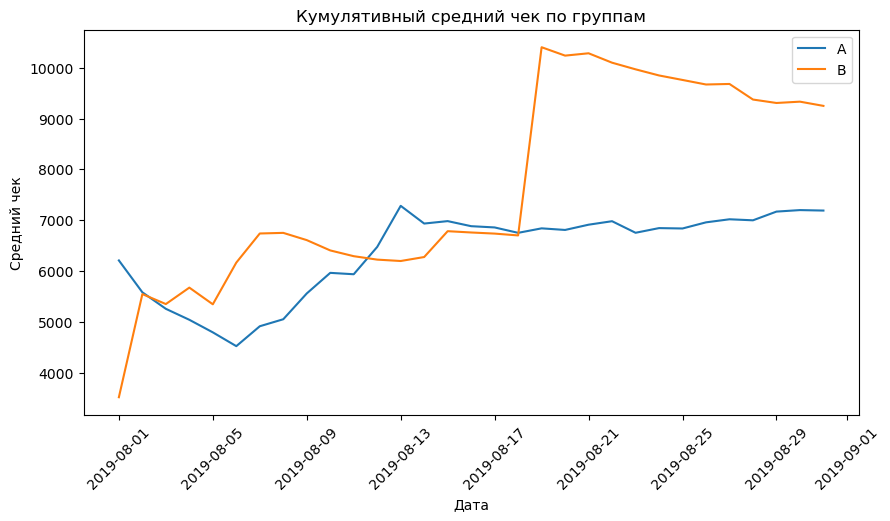

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'] / cumulative_a['orders'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'] / cumulative_b['orders'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.legend();

Средний чек обеих групп выравнивается после 13.08. Однако видим, что по группе В есть большой скачок после 17.08 и после него чек этой группы начинает снижаться.

**Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

In [38]:
# собираем данные в одном датафрейме
merged_cumulative = cumulative_a.merge(cumulative_b, on=['date'], suffixes=('_a', '_b'))
merged_cumulative.head()

,date,revenue_a,orders_a,visitors_a,revenue_b,orders_b,visitors_b
0,2019-08-01,142779,23,719,59758,17,713
1,2019-08-02,234381,42,1338,221801,40,1294
2,2019-08-03,346854,66,1845,288850,54,1803
3,2019-08-04,388030,77,2562,385740,68,2573
4,2019-08-05,474413,99,3318,475648,89,3280


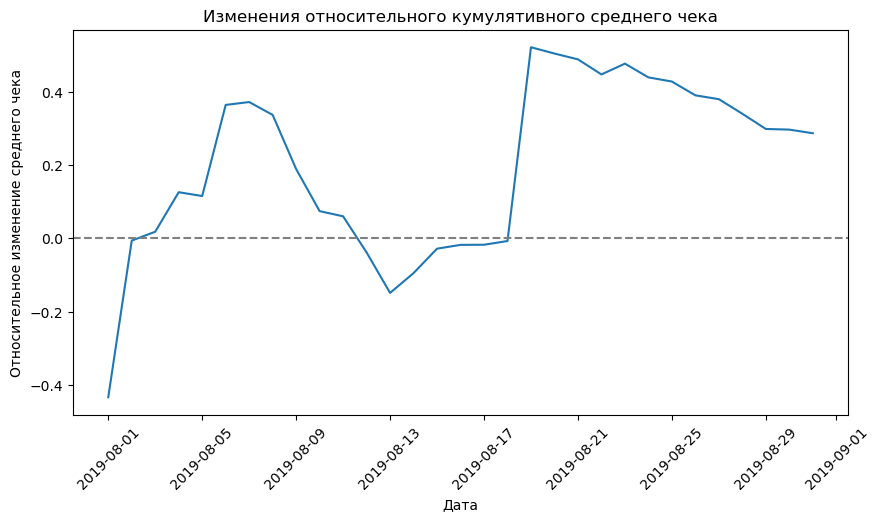

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(merged_cumulative['date'],
    (merged_cumulative['revenue_b'] / merged_cumulative['orders_b']) / 
    (merged_cumulative['revenue_a'] / merged_cumulative['orders_a']) -1)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека')
plt.title('Изменения относительного кумулятивного среднего чека')
plt.axhline(y=0, color='grey', linestyle='--');

Видим два скачка 05.08 и 17.08. Скачок 17.08 отмечали на графике ранее. Вероятно, большие заказы есть и раньше.

**Построим график кумулятивного среднего количества заказов на посетителя по группам.**

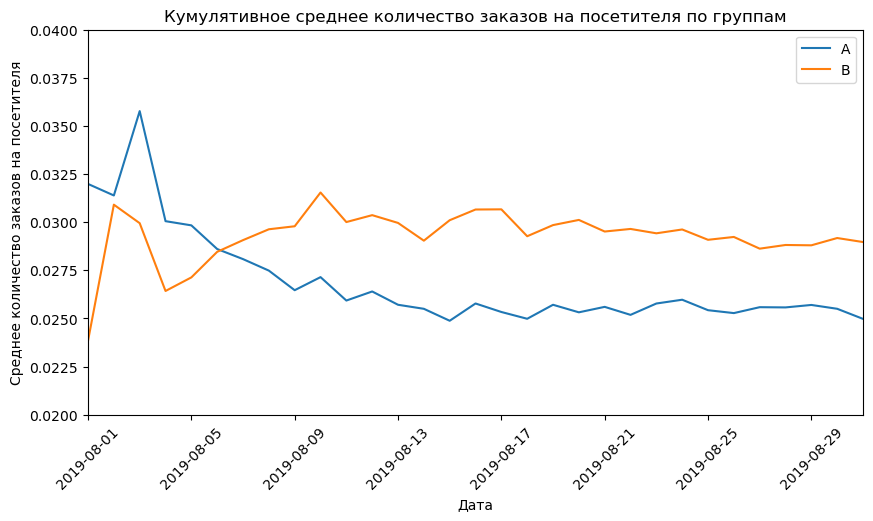

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['orders'] / cumulative_a['visitors'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['orders'] / cumulative_b['visitors'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.axis(xmin=cumulative_a['date'].min(), xmax=cumulative_a['date'].max(), ymin=0.020, ymax=0.04)
plt.legend();

Видим, что до определенного значения графики колебались, затем выровнялись, группа В начала лидировать и показала себя лучше.

**Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

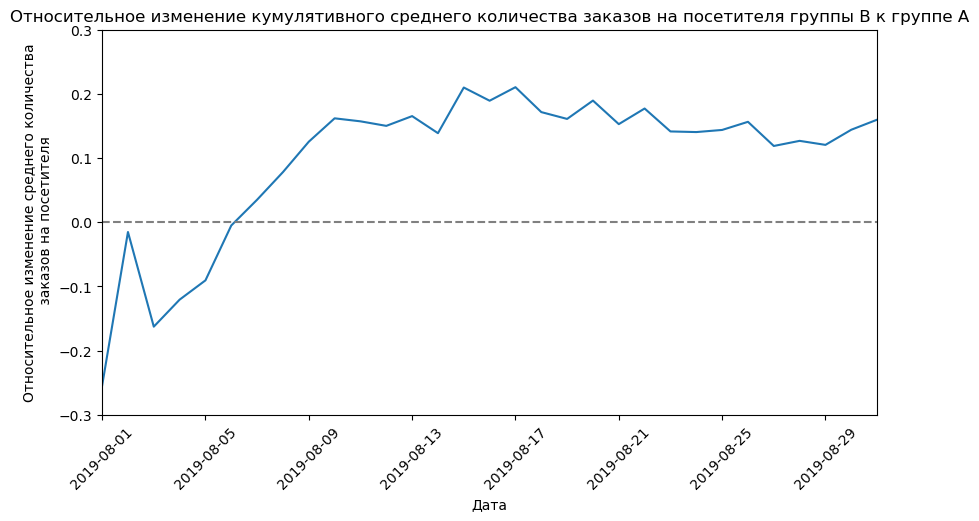

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(merged_cumulative['date'],
        (merged_cumulative['orders_b'] / merged_cumulative['visitors_b']) 
        / (merged_cumulative['orders_a'] / merged_cumulative['visitors_a']) -1)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего количества\n заказов на посетителя')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axis(xmin=merged_cumulative['date'].min(), xmax=merged_cumulative['date'].max(), ymin=-0.3, ymax=0.3)
plt.axhline(y=0, color='grey', linestyle='--');

В начале группа В проигрывала группе А, но затем существенно обогнала и показала результат лучше. Нужно проверить аномалии.

**Построим точечный график стоимостей заказов. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

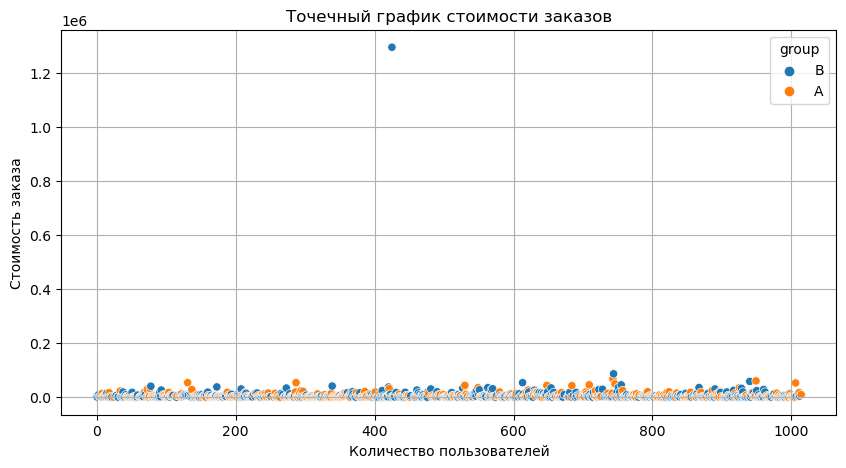

In [42]:
x_values = pd.Series(range(0,orders['revenue'].count())) 

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y='revenue', hue='group', data=orders)
plt.ylabel('Стоимость заказа')
plt.grid()
plt.title('Точечный график стоимости заказов')
plt.xlabel('Количество пользователей');

Как предполагали ранее, средний чек группы В был увеличен всего из-за одного заказа. Уберем его.

[26785. 53904.]


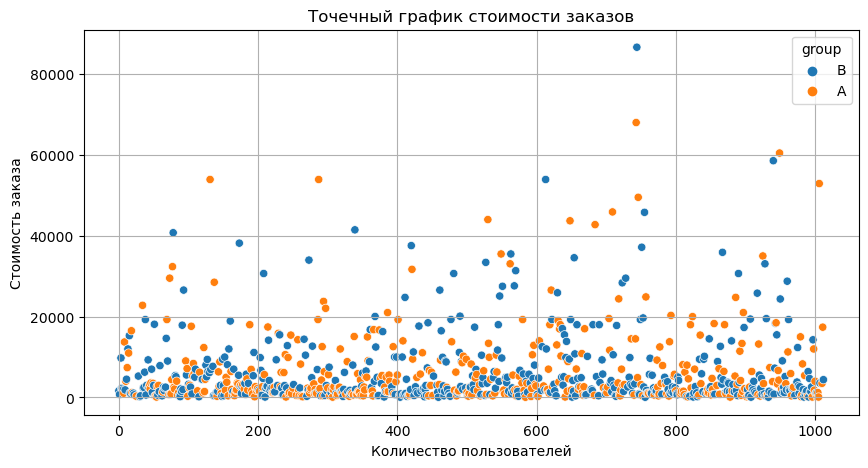

In [43]:
orders_new = orders.query('revenue < 200000')
x_values = pd.Series(range(0, orders_new['revenue'].count()))
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y='revenue', hue='group', data=orders_new)
plt.grid()
plt.title('Точечный график стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество пользователей');
print(np.percentile(orders['revenue'], [95, 99]))

Тут уже все выглядит более ясно, поэтому убираем все, что выше 99 перцентиля.

In [44]:
per_99 = np.percentile(orders['revenue'], [99])[0]
orders_new = orders.query('revenue<= @per_99')

Таблица с заказами очищена от аномально дорогих заказов, теперь изучим количество заказов.

**Построим точечный график количества заказов. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных пользователей.**

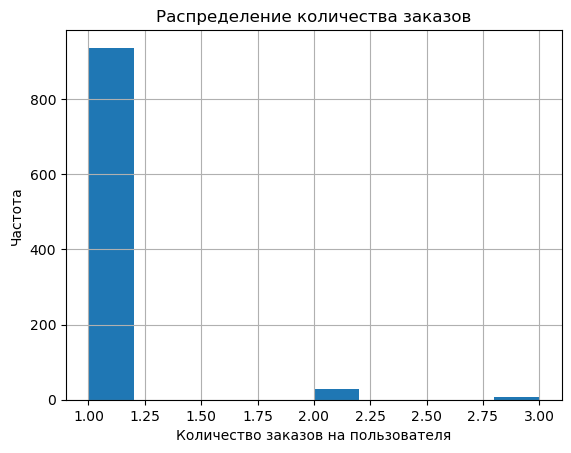

In [45]:
orders_by_users = (orders.groupby('visitorId')['revenue'].count()
                   .reset_index()
                   .rename(columns={'revenue':'orders'}))
orders_by_users['orders'].hist()
plt.ylabel('Частота')
plt.xlabel('Количество заказов на пользователя')
plt.title('Распределение количества заказов');

В основном клиенты делают 1, намного реже 2 или 3 заказа.

[1. 2.]


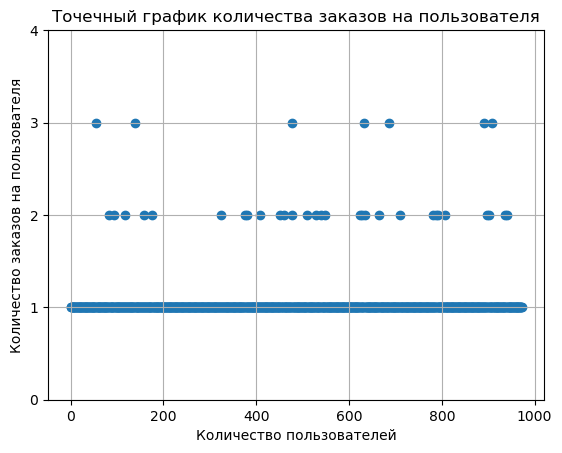

In [46]:
x_values = pd.Series(range(0,orders_by_users['orders'].count()))
plt.scatter(data=orders_by_users, x=x_values, y='orders') 
plt.grid()
plt.title('Точечный график количества заказов на пользователя')
plt.yticks([0, 1, 2, 3, 4]);
plt.ylabel('Количество заказов на пользователя')
plt.xlabel('Количество заказов')
plt.xlabel('Количество пользователей');
print(np.percentile(orders_by_users['orders'], [95, 99]))

Больше двух заказов это аномалия. Уберем таких пользователей.

In [47]:
per_99 = np.percentile(orders_by_users['orders'], [99])[0]
orders_by_users_new = orders_by_users.query('orders<= @per_99')

Сформируем итоговую таблицу заказов без аномалий.

In [48]:
orders_new = orders_new.loc[orders_new['visitorId'].isin(orders_by_users_new['visitorId'])]

In [49]:
losses = orders.shape[0] - orders_new.shape[0]
print('Абсолютные потери:', losses)
print('Относительные потери: {0:.1%}'.format(losses / orders['visitorId'].nunique()))

Абсолютные потери: 30
Относительные потери: 3.1%


**Вывод:** Изучены сырые данные, подготовлена таблица по этим данным без аномалий. При аномалиях группа В показала себя лучше, но их мы убрали. Будем далее изучать данные.

## Статистическая значимость

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

Для проверки будем использовать непараметрический критерий Манна-Уитни, так как с большой долей вероятности можно утверждать что данные у нас распределены ненормально.

- Н0 - статистические значимые различия среднего количества заказов на посетителя между группами отсутствуют
- Н1 - статистические значимые различия среднего количества заказов на посетителя между группами есть

In [50]:
orders_by_usersA = orders[orders['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']

orders_by_usersB = orders[orders['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

In [51]:
freeloadersA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() 
                                            - len(orders_by_usersA['orders'])), name='orders')
freeloadersB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() 
                                            - len(orders_by_usersB['orders'])), name='orders')

In [52]:
sampleA = pd.concat([orders_by_usersA['orders'], freeloadersA])
sampleB = pd.concat([orders_by_usersB['orders'], freeloadersB])

In [53]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))

p_value: 0.01102


P-value меньше 0.05, поэтому нулевую гипотезу отвергаем (есть различия).

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

- Н0 - статистические значимые различия среднего чека между группами отсутствуют
- Н1 - статистические значимые различия среднего чека между группами есть

In [54]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
))
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))
print('Разница: {0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()
                                /orders[orders['group']=='A']['revenue'].mean()-1))

p_value: 0.82949
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95
Разница: 28.7%


P-value значительно больше 0.05, значит нулевая гипотеза не отвергается (нет различий). Различие среднего чека между сегментами 28.7% или чуть больше 2000, что оказалось не статистически значимо.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

- Н0 - статистические значимые различия среднего количества заказов на посетителя между группами отсутствуют
- Н1 - статистические значимые различия среднего количества заказов на посетителя между группами есть

In [55]:
orders_by_usersA = orders_new[orders_new['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']

orders_by_usersB = orders_new[orders_new['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

In [56]:
freeloadersA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() 
                                            - len(orders_by_usersA['orders'])), name='orders')
freeloadersB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() 
                                            - len(orders_by_usersB['orders'])), name='orders')

In [57]:
sampleA = pd.concat([orders_by_usersA['orders'], freeloadersA])
sampleB = pd.concat([orders_by_usersB['orders'], freeloadersB])

In [58]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))

p_value: 0.00695


На очищенных данных ситуация почти не изменилась. Группа В так же в лидерах. Отвергаем нулевую гипотезу о равенстве среднего количества заказов.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

- Н0 - статистические значимые различия среднего чека между группами отсутствуют
- Н1 - статистические значимые различия среднего чека между группами есть

In [59]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])[1]
))
print('Средний чек (очищенный) группы А: {:.2f}'.format(orders_new[orders_new['group']=='A']['revenue'].mean()))
print('Средний чек (очищенный) группы B: {:.2f}'.format(orders_new[orders_new['group']=='B']['revenue'].mean()))
print('Разница: {0:.1%}'.format(orders_new[orders_new['group']=='B']['revenue'].mean()
                                /orders_new[orders_new['group']=='A']['revenue'].mean()-1))

p_value: 0.78770
Средний чек (очищенный) группы А: 6487.02
Средний чек (очищенный) группы B: 6277.27
Разница: -3.2%


Мы по прежнему не можем отвергнуть нулевую гипотезу о равенстве среднего чека. Но заметим, что средние чеки значительно выровнялись, нет такой большой разницы между группами.

**Вывод:** 
- Есть статистически значимое различие по конверсии между группами и по сырым данным, и по очищенным данным
- И по сырым данным, и по очищенным данным нет статистически значимого различия по среднему чеку между группами
- Показатели группы B лучше группы A

На основе выводов выше принимаем решение остановить А/В-тест и зафиксировать победу группы В.